In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.layers import Dense, BatchNormalization , PReLU
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
 (x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 7s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

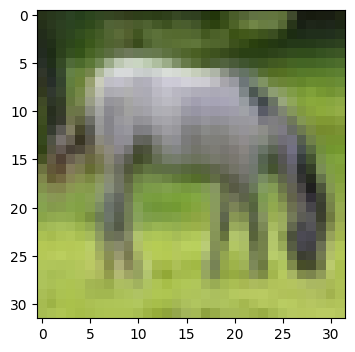

In [ ]:
plt.figure(figsize = (4,4))
plt.imshow(x_train[87])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:

x_train[0]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
#Model Building

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(54, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.MaxPooling2D((2, 2)),

    #Residual Block
     layers.Conv2D(108, kernel_size=(1,1),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),


    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 54)        540       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 54)       216       
 ormalization)                                                   
                                                                 
 p_re_lu (PReLU)             (None, 32, 32, 54)        55296     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 54)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 108)       2052      
                                                                 
 flatten (Flatten)           (None, 27648)             0

In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 28s 9ms/step - loss: 1.6913 - accuracy: 0.3742
Epoch 2/100
1563/1563 [==============================] - 13s 9ms/step - loss: 1.3829 - accuracy: 0.4996
Epoch 3/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2421 - accuracy: 0.5511
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1321 - accuracy: 0.5946
Epoch 5/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0428 - accuracy: 0.6234
Epoch 6/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9686 - accuracy: 0.6525
Epoch 7/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9016 - accuracy: 0.6764
Epoch 8/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8419 - accuracy: 0.6963
Epoch 9/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7908 - accuracy: 0.7160
Epoch 10/100
1563/1563 [==============================] - 13s 8m

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[8.49652849e-03, 1.70176767e-03, 7.47186306e-04, 4.31046402e-03,
        5.49185148e-04, 7.97245775e-06, 8.03700241e-04, 3.52113034e-07,
        9.80111659e-01, 3.27126123e-03],
       [3.51989118e-04, 1.36322703e-03, 2.30174933e-17, 1.12801607e-13,
        4.69487504e-11, 8.90811158e-20, 1.12153982e-12, 4.05163900e-18,
        9.98283744e-01, 1.10801932e-06],
       [8.53445455e-02, 4.23200475e-03, 5.12735678e-05, 5.42101159e-04,
        3.65597452e-03, 1.06825028e-05, 1.89877566e-04, 1.02678125e-04,
        8.62681270e-01, 4.31896299e-02],
       [9.81068075e-01, 1.46486145e-03, 2.06008437e-03, 4.99994530e-05,
        1.86836885e-04, 1.24193411e-06, 8.40395558e-07, 9.26578741e-06,
        1.51348943e-02, 2.38616522e-05],
       [7.48912221e-09, 1.30708997e-07, 2.16953431e-05, 5.17121464e-07,
        1.49120358e-04, 2.13892258e-06, 9.99826372e-01, 2.04701482e-08,
        5.91339067e-08, 3.33972794e-10]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[8, 8, 8, 0, 6, 6, 1, 4, 3, 8]

In [ ]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [ ]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.60      0.68      0.64      1000
           1       0.84      0.64      0.72      1000
           2       0.48      0.52      0.50      1000
           3       0.42      0.39      0.40      1000
           4       0.42      0.72      0.53      1000
           5       0.69      0.34      0.45      1000
           6       0.57      0.80      0.67      1000
           7       0.80      0.50      0.61      1000
           8       0.66      0.77      0.71      1000
           9       0.81      0.60      0.69      1000

    accuracy                           0.59     10000
   macro avg       0.63      0.59      0.59     10000
weighted avg       0.63      0.59      0.59     10000



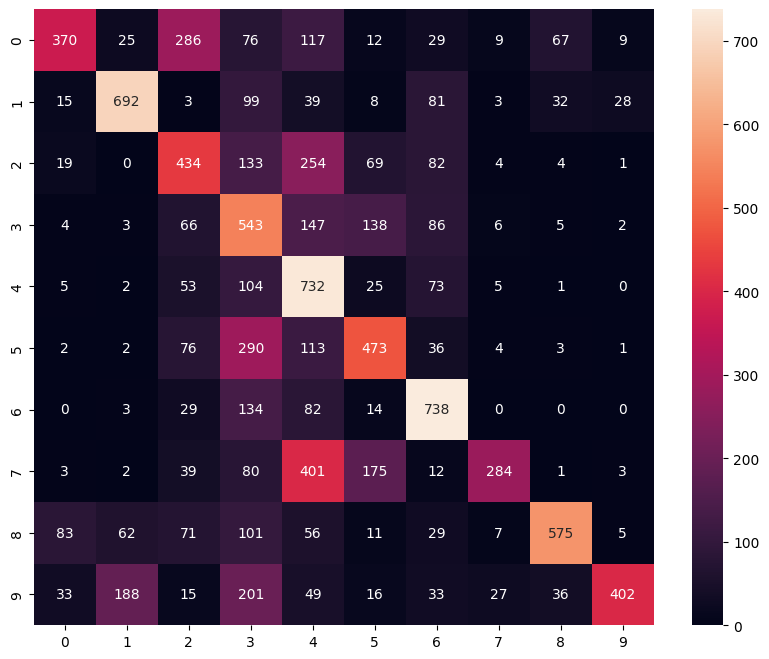

In [ ]:
# print out the confusion matrix
cm = confusion_matrix(y_test, y_classes)
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, fmt=".0f");

In [ ]:
classes =["Aeroplane","Automobile","Bird","XYZ","Deer","Dog"," 123","Horse","Ship","Truck"]

In [ ]:
# import cv2

# a=cv2.imread('20.jpg')
# a=a/255
# a=cv2.resize(a,(32,32))
# a=a.reshape(1,32,32,3)
# z_pred=cnn.predict(a)
# z_act=np.argmax(z_pred)
# print(classes[z_act])

TypeError: ignored

In [ ]:
# Bird,Automobile